In [82]:
import pandas as pd

In [83]:
import numpy as np

In [84]:
house_df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')


In [85]:
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [86]:
house_df.shape

(2919, 13)

In [87]:
house_df.drop_duplicates(inplace=True)

In [88]:
house_df.shape

(2919, 13)

In [89]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [90]:
house_df.drop(columns = ['Id'], inplace = True)

In [91]:
house_df.columns


Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [92]:
house_df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [93]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(house_df[['SalePrice']])

SimpleImputer()

In [94]:
house_df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [95]:
imputer.statistics_

array([180921.19589041])

In [96]:
house_df['SalePrice'] = imputer.transform(house_df[['SalePrice']])

In [97]:
house_df.isna().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [98]:
house_df = house_df.fillna(0)

In [99]:
house_df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [100]:
house_df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
sns.set_style('darkgrid')

<Axes: ylabel='LotArea'>

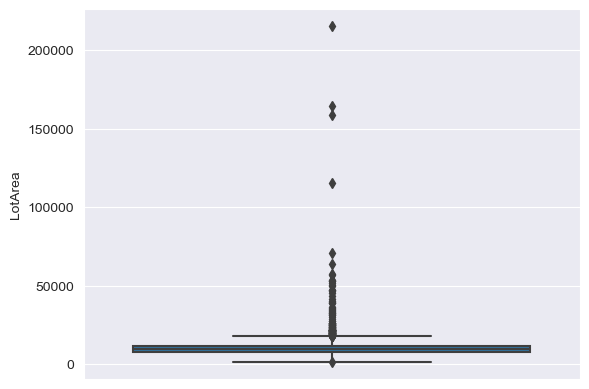

In [103]:
sns.boxplot(house_df,y='LotArea')

# Handling Outliers in Lot Area using IQR

In [104]:
import numpy as np

Q1 = np.percentile(house_df['LotArea'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(house_df['LotArea'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

In [105]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

In [106]:
df = house_df[(house_df.LotArea < upperBound) & (house_df.LotArea > lowerBound)]

In [107]:
df.shape

(2791, 12)

In [108]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,57.611967,9209.453601,5.571121,1971.597635,1984.419921,47.315657,1038.609817,179497.074902
std,42.660655,3236.685341,1.104184,30.393967,20.924098,163.624782,414.721045,53549.001801
min,20.000000,1470.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7330.000000,5.000000,1954.000000,1965.000000,0.000000,786.000000,160000.000000
50%,50.000000,9254.000000,5.000000,1974.000000,1993.000000,0.000000,981.000000,180921.195890
75%,70.000000,11184.000000,6.000000,2001.000000,2004.000000,0.000000,1276.500000,180921.195890
max,190.000000,17671.000000,9.000000,2010.000000,2010.000000,1526.000000,3206.000000,745000.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


# Converting Catagorical Values to Numerical

In [112]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [113]:
col = ['MSSubClass', 'MSZoning', 'LotArea',	'LotConfig', 'BldgType', 'OverallCond',	'YearBuilt','YearRemodAdd',	'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [119]:
X_test.shape

(559, 11)

In [131]:
X_test

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
2888,30,RM,8534,Inside,1Fam,4,1925,1950,Wd Sdng,0.0,432.0
2364,120,FV,4379,FR2,TwnhsE,5,2004,2004,MetalSd,0.0,1378.0
2075,20,RL,7200,Inside,1Fam,7,1951,1951,MetalSd,0.0,876.0
2564,20,RL,13108,Inside,1Fam,5,1951,1951,Wd Sdng,0.0,0.0
2216,20,0,14584,Inside,1Fam,5,1952,1952,AsbShng,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2631,60,RL,15922,Corner,1Fam,5,2005,2006,VinylSd,0.0,1390.0
162,20,RL,12182,Corner,1Fam,5,2005,2005,VinylSd,0.0,1541.0
2680,60,RL,9233,Inside,1Fam,5,2000,2000,VinylSd,0.0,1540.0
2085,20,RM,9836,Inside,1Fam,5,2008,2008,VinylSd,0.0,192.0


In [179]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [138]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
scale = StandardScaler()

In [180]:
preprocesser = ColumnTransformer(
        transformers = [
            ('MinMaxScale', scaler, [0, 2, 5, 6, 7, 9, 10]),
            ('OHE', ohe, [1, 3, 4, 8]),
        ],
        remainder='passthrough'
)

In [181]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMaxScale', MinMaxScaler(),
                                 [0, 2, 5, 6, 7, 9, 10]),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [1, 3, 4, 8])])

In [182]:
X_train_dummy = preprocesser.fit_transform(X_train)

In [183]:
X_test_dummy = preprocesser.transform(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [184]:
X_train_dummy

array([[0.23529412, 0.56527375, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.94494167, 0.375     , ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.60366644, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.57589038, 0.625     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49422875, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.44700944, 0.75      , ..., 0.        , 0.        ,
        0.        ]])

In [185]:
X_test_dummy

array([[0.05882353, 0.43602247, 0.375     , ..., 0.        , 1.        ,
        0.        ],
       [0.58823529, 0.17955682, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35368187, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23529412, 0.47916795, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.51638788, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.47355102, 0.875     , ..., 0.        , 0.        ,
        0.        ]])

In [186]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [187]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 11), (559, 11), (2232,), (559,))

In [188]:
from sklearn.metrics import mean_absolute_error

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 30399.25890130186 score : 0.32281304319919635


In [190]:
mean_absolute_error(y_test, y_pred)

30399.25890130186

In [192]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1)


In [196]:
lasso_reg.fit(X_train_dummy, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [198]:
lasso_pred = lasso_reg.predict(X_test_dummy)

In [199]:
mean_absolute_error(y_test, lasso_pred)

30380.465927434816

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)

ridge_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)

